In [1]:
import qiskit

In [2]:
pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to c:\users\anirudh\appdata\local\temp\pip-req-build-0j2qqmby

  Created wheel for qiskit-textbook: filename=qiskit_textbook-0.1.0-py3-none-any.whl size=17001 sha256=261314d076bcd9a2f2d7e5902a00bc450f86b91b5d34a7c2e2e3a018fa7f4d0c
  Stored in directory: C:\Users\ANIRUDH\AppData\Local\Temp\pip-ephem-wheel-cache-7m7sy6e4\wheels\80\c4\dd\b7ea1ee2a7247e8997db78bc777bbe22e61ab1e5ed1c4b46e1
Successfully built qiskit-textbook


In [5]:
import numpy as np
from numpy import pi
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
%config InclineBackend.figure_format = 'svg'

In [6]:
qc = QuantumCircuit(3)

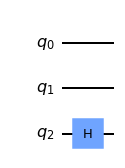

In [7]:
qc.h(2)
qc.draw('mpl')

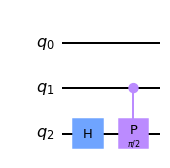

In [8]:
qc.cp(pi/2, 1, 2)
qc.draw('mpl')

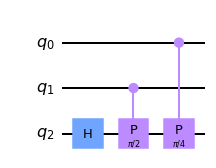

In [9]:
qc.cp(pi/4, 0, 2)
qc.draw('mpl')

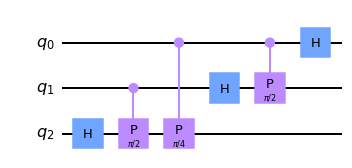

In [10]:
qc.h(1)
qc.cp(pi/2, 0, 1)
qc.h(0)
qc.draw('mpl')

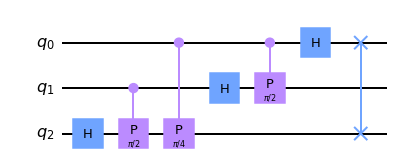

In [11]:
qc.swap(0,2)
qc.draw('mpl')

In [13]:
def qft_rotations(circuit, n):
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)

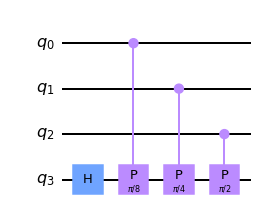

In [14]:
qc = QuantumCircuit(4)
qft_rotations(qc,4)
qc.draw('mpl')

In [15]:
from qiskit_textbook.widgets import scalable_circuit
scalable_circuit(qft_rotations)

IntSlider(value=4, max=8, min=1)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01G\x00\x00\x01\x08\x08\x06\x00\x00\x00\xccG6\xd2\x…

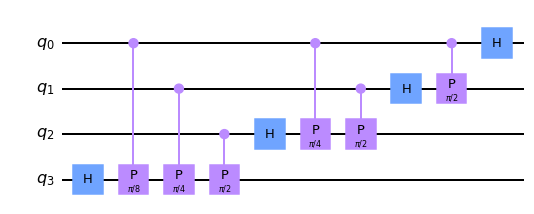

In [21]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

# Let's see how it looks:
qc = QuantumCircuit(4)
qft_rotations(qc,4)
qc.draw('mpl')

In [22]:
scalable_circuit(qft_rotations)

IntSlider(value=4, max=8, min=1)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xb0\x00\x00\x01\x08\x08\x06\x00\x00\x00\xa75\xc7…

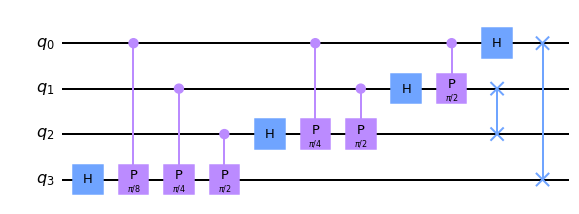

In [24]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

# Let's see how it looks:
qc = QuantumCircuit(4)
qft(qc,4)
qc.draw('mpl')

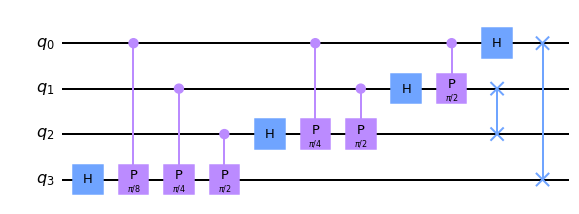

In [25]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit
def qft(circuit, n):
    qft_rotation(circuit, n)
    swap_registers(circuit, n)
    return circuit
qc = QuantumCircuit(4)
qft(qc,4)
qc.draw('mpl')

In [26]:
scalable_circuit(qft)

IntSlider(value=4, max=8, min=1)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xec\x00\x00\x01\x08\x08\x06\x00\x00\x00\x04\x1d\…

In [27]:
bin(5)

'0b101'

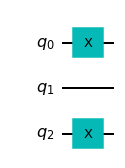

In [28]:
qc = QuantumCircuit(3)
qc.x(0)
qc.x(2)
%config InclineBackend.figure_format = 'svg'
qc.draw('mpl')

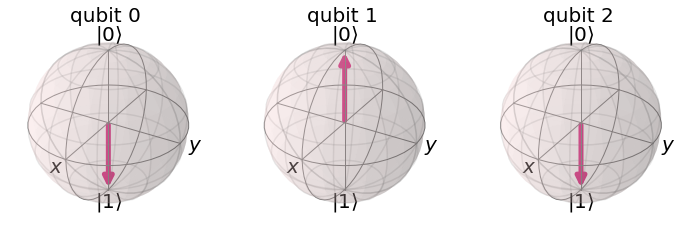

In [30]:
backend = Aer.get_backend("statevector_simulator")
statevector = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

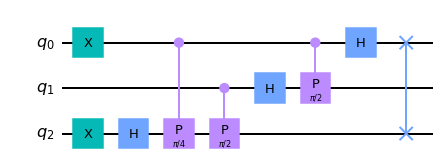

In [31]:
qft(qc,3)
qc.draw('mpl')

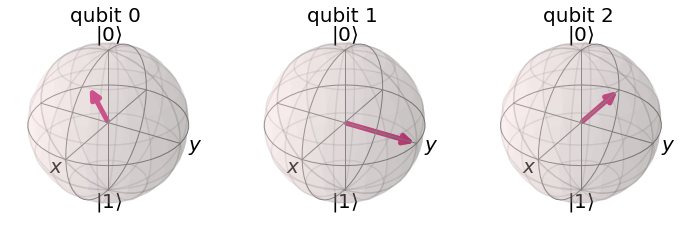

In [32]:
statevector = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

In [39]:
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

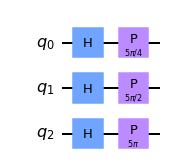

In [35]:
nqubits = 3
number = 5
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(number*pi/4,0)
qc.p(number*pi/2,1)
qc.p(number*pi,2)
qc.draw('mpl')

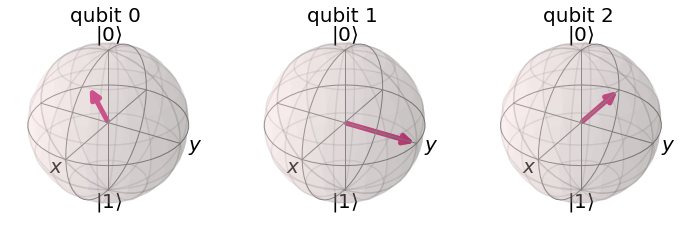

In [36]:
backend = Aer.get_backend("statevector_simulator")
statevector = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

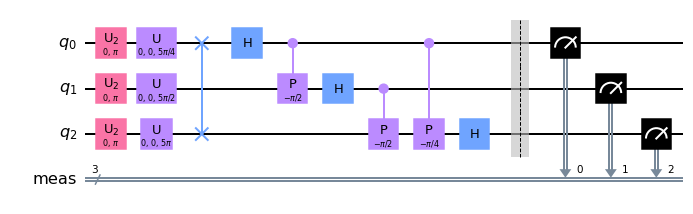

In [40]:
qc = inverse_qft(qc,nqubits)
qc.measure_all()
qc.draw('mpl')

In [41]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= nqubits
                                      and not x.configuration().simulator
                                      and x.status().operational==True))
print("lest busy backend:", backend)

C:\Users\ANIRUDH\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


lest busy backend: ibmq_valencia


In [42]:
shots = 2048
job = execute(qc, backend=backend, shots=shots, optimization_level=3)
job_monitor(job)

Job Status: job has successfully run


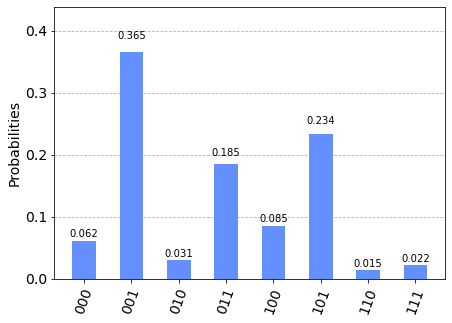

In [43]:
counts = job.result().get_counts()
plot_histogram(counts)